In [134]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [136]:
# Read the data with Pandas
df = pd.read_csv(r'C:\Users\Denis\Downloads\archive\movies.csv')

In [137]:
# Check the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [45]:
# Looking for missing values
for i in df.columns:
    pct_missing = np.mean(df[i].isnull())
    print('{} - {}%'.format(i, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [23]:
# Droping missing values in Rating and Gross column because they are less then 5%

In [46]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [50]:
threshold = len(df) * 0.05
threshold

383.40000000000003

In [ ]:
# Looking for columns with null data less the 5%

In [52]:
col_to_drops = df.columns[df.isna().sum() <= threshold]

In [53]:
col_to_drops

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'gross', 'company', 'runtime'],
      dtype='object')

In [54]:
# Deleting nulls
df.dropna(subset=col_to_drops, inplace=True)

In [56]:
# Looking for columns where we still have nulls
col_with_missing_value = df.columns[df.isna().sum() > 0]
col_with_missing_value

Index(['budget'], dtype='object')

In [57]:
for i in col_with_missing_value[:-1]:
    df[i].fillna(df[i].mode()[0])

In [58]:
df.isna().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
dtype: int64

In [138]:
# Looking for median budget by genre
df_dict = df.groupby('genre')['budget'].median().to_dict()
df_dict

{'Action': 40000000.0,
 'Adventure': 25000000.0,
 'Animation': 70000000.0,
 'Biography': 20000000.0,
 'Comedy': 17000000.0,
 'Crime': 15000000.0,
 'Drama': 15000000.0,
 'Family': 17000000.0,
 'Fantasy': 9000000.0,
 'History': 323562.0,
 'Horror': 8750000.0,
 'Music': nan,
 'Musical': nan,
 'Mystery': 24000000.0,
 'Romance': 22000000.0,
 'Sci-Fi': 13000000.0,
 'Sport': nan,
 'Thriller': 8000000.0,
 'Western': 10500000.0}

In [139]:
# Inputing by sub-groups
df['budget'] = df['budget'].fillna(df['genre'].map(df_dict))

In [140]:
df.isna().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        4
gross       189
company      17
runtime       4
dtype: int64

In [141]:
# Deleting left 3 values
col_to_drops = df.columns[df.isna().sum() <= threshold]
df.dropna(subset=col_to_drops, inplace=True)

In [142]:
# No more missing values
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [143]:
# Data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [144]:
# Change data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [75]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [145]:
# Change data type
df['released'] = df['released'].astype(str)

In [146]:
# Extracting correct year
df['correct_year'] = df['released'].str.extract(r',\s*(.{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [147]:
# Sorting by gross
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [148]:
# Droping duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,15000000,1672,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,15000000,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,17000000,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,15000000,682,Roxwell Films,93.0,2020


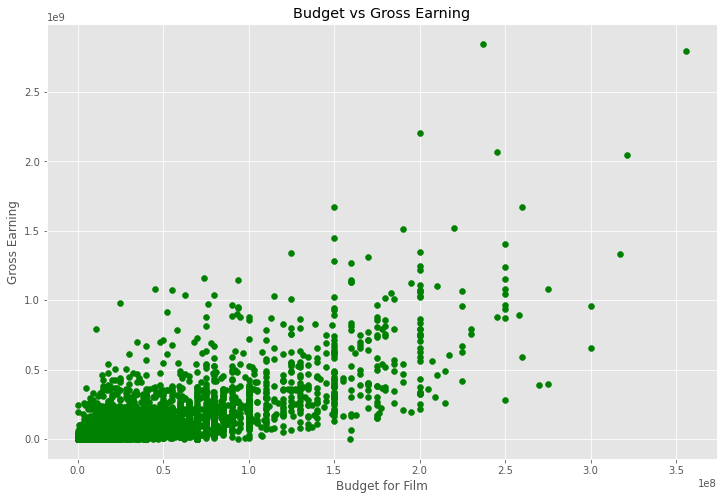

In [149]:
# Scatter plot with budget and gross
plt.scatter(data=df, x='budget', y='gross', color='green')
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earning')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

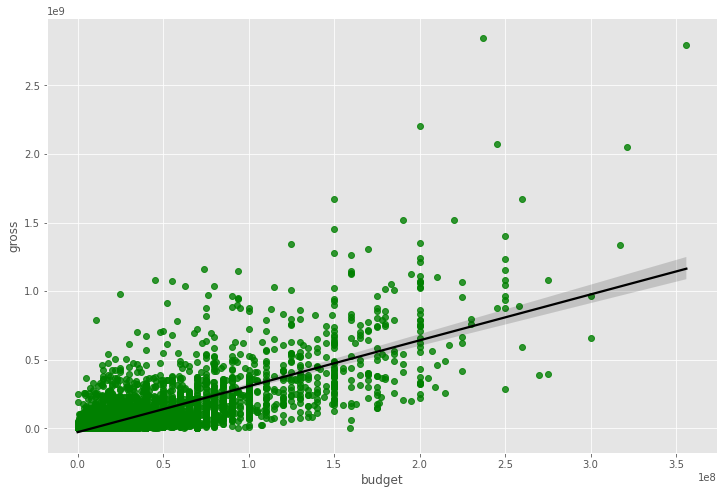

In [150]:
# Plot te Budget vs Gross using Seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'green'}, line_kws={'color':'black'})

In [151]:
# Looking for correlation
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.093993,0.219213,0.293934,0.259085,0.114071
score,0.093993,1.000000,0.415439,0.058400,0.188241,0.396865
votes,0.219213,0.415439,1.000000,0.452736,0.631074,0.310286
budget,0.293934,0.058400,0.452736,1.000000,0.738411,0.264622
gross,0.259085,0.188241,0.631074,0.738411,1.000000,0.245397
runtime,0.114071,0.396865,0.310286,0.264622,0.245397,1.000000


In [117]:
correlation_metrix = df.corr(method='pearson')

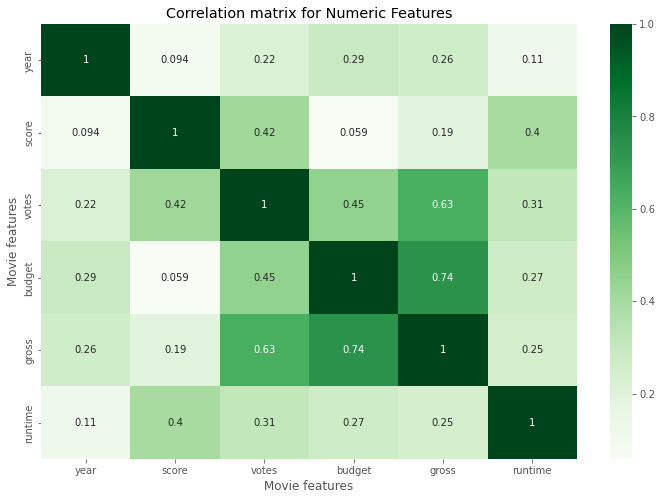

In [152]:
# Building a heatmap
sns.heatmap(correlation_metrix, annot=True, cmap="Greens")
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [153]:
# Look at company column
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [171]:
# Turning object data to categorical data
df_numerized = df

for i in df_numerized.columns:
    if (df_numerized[i].dtype == 'object'):
        df_numerized[i] = df_numerized[i].astype('category')
        df_numerized[i] = df_numerized[i].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,514,5,0,2009,678,7.8,1100000.0,1106,1703,2196,53,237000000,2847246203,2112,162.0,29
7445,516,5,0,2019,176,8.4,903000.0,159,707,2105,53,356000000,2797501328,1505,181.0,39
3045,6665,5,6,1997,686,7.8,1100000.0,1106,1703,1501,53,200000000,2201647264,2112,194.0,17
6663,4955,5,0,2015,680,7.8,876000.0,1076,2446,493,53,245000000,2069521700,1443,138.0,35
7244,517,5,0,2018,185,8.4,897000.0,159,707,2105,53,321000000,2048359754,1505,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2589,6,5,1998,2925,6.1,2900.0,1864,1220,2030,52,15000000,1672,1752,87.0,18
2906,4231,3,5,1996,510,7.4,37000.0,1957,1876,1418,11,15000000,1605,319,110.0,16
3818,3234,6,4,2000,1085,6.5,5200.0,704,1070,2181,52,17000000,1400,451,103.0,21
7580,4488,3,5,2019,1780,5.2,735.0,1390,2115,2141,53,15000000,682,1866,93.0,40


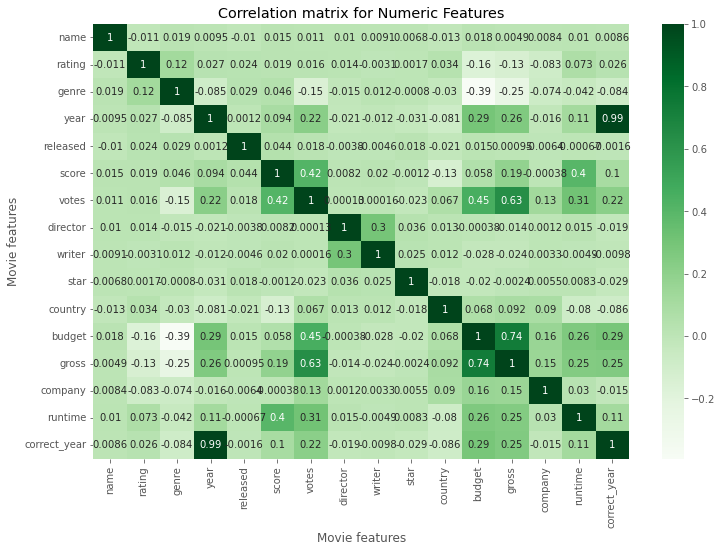

In [170]:
#Building a heatmap with new correlations

correlation_metrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_metrix, annot=True, cmap="Greens")
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [172]:
corr_matrix = df_numerized.corr()
corr_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.011207,0.019493,0.009464,-0.010322,0.015359,0.011177,0.010290,0.009071,0.006760,-0.012708,0.017674,0.004880,0.008387,0.010098,0.008604
rating,-0.011207,1.000000,0.121788,0.026616,0.024462,0.018922,0.016380,0.013734,-0.003080,0.001738,0.033959,-0.164610,-0.131916,-0.083193,0.073001,0.026125
genre,0.019493,0.121788,1.000000,-0.085298,0.028811,0.046447,-0.151656,-0.014929,0.011755,-0.000798,-0.029816,-0.392933,-0.246940,-0.074277,-0.042319,-0.084068
year,0.009464,0.026616,-0.085298,1.000000,0.001205,0.093993,0.219213,-0.021178,-0.011822,-0.030927,-0.080949,0.293934,0.259085,-0.015712,0.114071,0.993393
released,-0.010322,0.024462,0.028811,0.001205,1.000000,0.044468,0.018075,-0.003822,-0.004641,0.018158,-0.020958,0.015025,0.000951,-0.006390,-0.000670,-0.001607
score,0.015359,0.018922,0.046447,0.093993,0.044468,1.000000,0.415439,0.008210,0.019657,-0.001247,-0.126355,0.058400,0.188241,-0.000384,0.396865,0.100329
votes,0.011177,0.016380,-0.151656,0.219213,0.018075,0.415439,1.000000,0.000128,0.000162,-0.022510,0.066842,0.452736,0.631074,0.128111,0.310286,0.216413
director,0.010290,0.013734,-0.014929,-0.021178,-0.003822,0.008210,0.000128,1.000000,0.296832,0.036473,0.012703,-0.000382,-0.014417,0.001228,0.015459,-0.018980
writer,0.009071,-0.003080,0.011755,-0.011822,-0.004641,0.019657,0.000162,0.296832,1.000000,0.024612,0.012153,-0.027937,-0.024179,0.003319,-0.004878,-0.009777
star,0.006760,0.001738,-0.000798,-0.030927,0.018158,-0.001247,-0.022510,0.036473,0.024612,1.000000,-0.018287,-0.019728,-0.002402,0.005465,0.008259,-0.029389


In [173]:
corr_pars = corr_matrix.unstack()
corr_pars

name          name            1.000000
              rating         -0.011207
              genre           0.019493
              year            0.009464
              released       -0.010322
                                ...   
correct_year  budget          0.287803
              gross           0.253270
              company        -0.015341
              runtime         0.114333
              correct_year    1.000000
Length: 256, dtype: float64

In [184]:
sorted_pairs = corr_pars.sort_values()
sorted_pairs

genre         budget         -0.392933
budget        genre          -0.392933
genre         gross          -0.246940
gross         genre          -0.246940
rating        budget         -0.164610
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
Length: 256, dtype: float64

In [ ]:
# Votes and Gross have the highest correlation with budget